## CAR PREDICTION PROJECTS

#### AIM
Build a model to predict the price of cars using the dataset gotten from kaggle repository. 

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#read in the data 
df = pd.read_csv("car_price_prediction_ (1).csv")
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


### EXPLORE AND CLEAN THE DATA

In [4]:
#EXPLORE THE DATA FEATURES

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


There is no null value, a well cleaned dataset. 

In [5]:
df.shape

(2500, 10)

#### Removal of Column of low and High Cardinality

In [6]:
df.drop(columns= ["Car ID"], inplace=True) #remove the column it is redundant for building the models
df.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [9]:
df.select_dtypes("object").nunique()

Brand            7
Fuel Type        4
Transmission     2
Condition        3
Model           28
dtype: int64

In [10]:
df.drop(columns= ["Transmission", "Model"], inplace=True) #remove the column it is redundant for building the models
df.head()

,Brand,Year,Engine Size,Fuel Type,Mileage,Condition,Price
0,Tesla,2016,2.3,Petrol,114832,New,26613.92
1,BMW,2018,4.4,Electric,143190,Used,14679.61
2,Audi,2013,4.5,Electric,181601,New,44402.61
3,Tesla,2011,4.1,Diesel,68682,New,86374.33
4,Ford,2009,2.6,Diesel,223009,Like New,73577.10


In [11]:
sorted(df.columns)

['Brand', 'Condition', 'Engine Size', 'Fuel Type', 'Mileage', 'Price', 'Year']

### Multicollinality
cOLUMN WHICH CONTAIN DATA IN OUR TARGET COLUMN AS WELL

<Axes: >

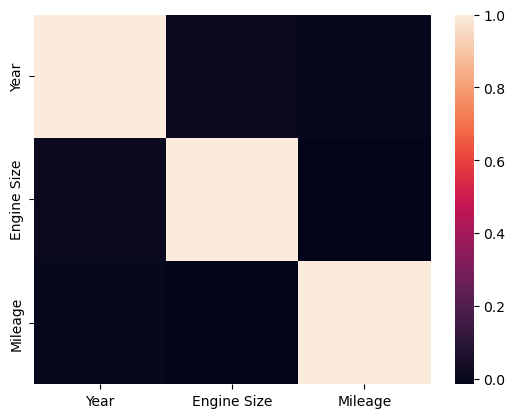

In [13]:
corr = df.select_dtypes("number").drop(columns= 'Price').corr()
sns.heatmap(corr)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        2500 non-null   object 
 1   Year         2500 non-null   int64  
 2   Engine Size  2500 non-null   float64
 3   Fuel Type    2500 non-null   object 
 4   Mileage      2500 non-null   int64  
 5   Condition    2500 non-null   object 
 6   Price        2500 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 136.8+ KB


### Data PREPARATIONS 

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline


### Label Encoding

In [25]:

cat_features = ["Brand", "Fuel Type", "Condition"]

for cat_feature in cat_features:
  df[f"{cat_feature}_cat"] = df[cat_feature].astype('category')
  df[f"{cat_feature}_cat"] = df[f"{cat_feature}_cat"].cat.codes


# Read more on Pandas get_dummies

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          2500 non-null   object 
 1   Year           2500 non-null   int64  
 2   Engine Size    2500 non-null   float64
 3   Fuel Type      2500 non-null   object 
 4   Mileage        2500 non-null   int64  
 5   Condition      2500 non-null   object 
 6   Price          2500 non-null   float64
 7   Brand_cat      2500 non-null   int8   
 8   Fuel Type_cat  2500 non-null   int8   
 9   Condition_cat  2500 non-null   int8   
dtypes: float64(2), int64(2), int8(3), object(3)
memory usage: 144.2+ KB


In [26]:
df.head()

,Brand,Year,Engine Size,Fuel Type,Mileage,Condition,Price,Brand_cat,Fuel Type_cat,Condition_cat
0,Tesla,2016,2.3,Petrol,114832,New,26613.92,5,3,1
1,BMW,2018,4.4,Electric,143190,Used,14679.61,1,1,2
2,Audi,2013,4.5,Electric,181601,New,44402.61,0,1,1
3,Tesla,2011,4.1,Diesel,68682,New,86374.33,5,0,1
4,Ford,2009,2.6,Diesel,223009,Like New,73577.10,2,0,0


In [27]:
# Drop the reductant features since Label encoding have been done
df.drop(["Brand", "Fuel Type", "Condition"], axis=1, inplace=True)
df.head()

,Year,Engine Size,Mileage,Price,Brand_cat,Fuel Type_cat,Condition_cat
0,2016,2.3,114832,26613.92,5,3,1
1,2018,4.4,143190,14679.61,1,1,2
2,2013,4.5,181601,44402.61,0,1,1
3,2011,4.1,68682,86374.33,5,0,1
4,2009,2.6,223009,73577.10,2,0,0


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

targets = "Price"
features = ["Brand", "Year", "Engine Size", "Fuel Type", "Mileage", "Condition"]
X_train = df[features]
y_train = df[targets]


### Split the dataset 
into feature and target for the training sets

In [28]:
y = df["Price"] # Target
X = df.drop("Price", axis=1)

### Perform data Segmentation

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Calculate the baseline error

In [35]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len (y_train)
print ( "Mean price", round(y_mean, 2))
print ( "Baseline Mean absolute error", mean_absolute_error(y_train, y_pred_baseline))

Mean price 53094.63
Baseline Mean absolute error 23660.652954788573


## Build Model

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Prediction

In [38]:
y_pred_training = reg.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 23591.943665734972


### GENERALIZABILITY

In [33]:
reg.predict(X_test)

array([53392.19970602, 55860.92032473, 56097.59128272, 51968.70632808,
       55266.5024583 , 55679.33326426, 50323.13401463, 52808.31297538,
       56524.32722492, 57311.64845241, 53706.38155549, 53201.31871834,
       51315.69782932, 49779.28166483, 54557.60320196, 54536.85573966,
       56762.75996522, 52843.43814494, 52842.18098936, 53439.50796006,
       56838.3718632 , 53173.99531693, 51514.88339837, 52951.54452225,
       54040.54479595, 53374.79908047, 53706.34403351, 54867.5781881 ,
       55564.05851334, 53474.29998886, 54223.21826253, 54037.37130413,
       49847.37774336, 53459.03130648, 50822.43799784, 52543.28875264,
       51456.27808393, 53545.01205732, 55029.82678483, 51894.63899316,
       53421.57506531, 55346.86262395, 54589.11012918, 56051.22141874,
       52158.75508268, 51559.40151428, 53569.13762748, 52432.33725633,
       49853.97943959, 49865.00701861, 53658.32382798, 53621.25690995,
       54052.69715249, 53176.02212323, 51330.86161828, 55539.87895831,
      

In [37]:
y_pred_test = pd.Series(reg.predict(X_test))
y_pred_test.head()

0    53392.199706
1    55860.920325
2    56097.591283
3    51968.706328
4    55266.502458
dtype: float64

### Evaluate

In [34]:
y_pred = reg.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))

MAE 23845.748549386026


### Communicate Results

In [45]:
def make_prediction(Year, EngineSize, Mileage, Brand, FuelType, Condition):
    data = {         "Year" :  Year, 
        "Engine Size" : EngineSize, 
        "Mileage" : Mileage,
        "Brand_cat" : Brand,
        "Fuel Type_cat" : FuelType,
        "Condition_cat": Condition
    }
    df = pd.DataFrame(data, index=[0])
    prediction = reg.predict(df).round(2)
    return f"Prediction Price of Car: $ {prediction}"


In [48]:
make_prediction(2021, 3.5, 15000, 2, 4, 2)

'Prediction Price of Car: $ [52062.51]'

### OTHER MACHINE LEARNING ALGORITHM

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred = dt_reg.predict(X_test)

print("MAE",mean_absolute_error(y_test,y_pred))

MAE 31669.00158666666


### SPECIAL VECTOR MACHINE SVM

In [50]:
from sklearn.svm import SVR

sv_reg = SVR()
sv_reg.fit(X_train, y_train)
y_pred = sv_reg.predict(X_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 23806.0511376202
